## 探索电影数据集

在这个项目中，你将尝试使用所学的知识，使用 `NumPy`、`Pandas`、`matplotlib`、`seaborn` 库中的函数，来对电影数据集进行探索。

下载数据集：
[TMDb电影数据](https://s3.cn-north-1.amazonaws.com.cn/static-documents/nd101/explore+dataset/tmdb-movies.csv)



数据集各列名称的含义：
<table>
<thead><tr><th>列名称</th><th>id</th><th>imdb_id</th><th>popularity</th><th>budget</th><th>revenue</th><th>original_title</th><th>cast</th><th>homepage</th><th>director</th><th>tagline</th><th>keywords</th><th>overview</th><th>runtime</th><th>genres</th><th>production_companies</th><th>release_date</th><th>vote_count</th><th>vote_average</th><th>release_year</th><th>budget_adj</th><th>revenue_adj</th></tr></thead><tbody>
 <tr><td>含义</td><td>编号</td><td>IMDB 编号</td><td>知名度</td><td>预算</td><td>票房</td><td>名称</td><td>主演</td><td>网站</td><td>导演</td><td>宣传词</td><td>关键词</td><td>简介</td><td>时常</td><td>类别</td><td>发行公司</td><td>发行日期</td><td>投票总数</td><td>投票均值</td><td>发行年份</td><td>预算（调整后）</td><td>票房（调整后）</td></tr>
</tbody></table>


**请注意，你需要提交该报告导出的 `.html`、`.ipynb` 以及 `.py` 文件。**



---

---

## 第一节 数据的导入与处理

在这一部分，你需要编写代码，使用 Pandas 读取数据，并进行预处理。


**任务1.1：** 导入库以及数据

1. 载入需要的库 `NumPy`、`Pandas`、`matplotlib`、`seaborn`。
2. 利用 `Pandas` 库，读取 `tmdb-movies.csv` 中的数据，保存为 `movie_data`。

提示：记得使用 notebook 中的魔法指令 `%matplotlib inline`，否则会导致你接下来无法打印出图像。

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

tm_data = pd.read_csv("tmdb-movies.csv")

In [19]:
tm_data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


---

**任务1.2: ** 了解数据

你会接触到各种各样的数据表，因此在读取之后，我们有必要通过一些简单的方法，来了解我们数据表是什么样子的。

1. 获取数据表的行列，并打印。
2. 使用 `.head()`、`.tail()`、`.sample()` 方法，观察、了解数据表的情况。
3. 使用 `.dtypes` 属性，来查看各列数据的数据类型。
4. 使用 `isnull()` 配合 `.any()` 等方法，来查看各列是否存在空值。
5. 使用 `.describe()` 方法，看看数据表中数值型的数据是怎么分布的。



In [2]:
print(tm_data.columns)
print(tm_data.index)

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')
RangeIndex(start=0, stop=10866, step=1)


In [3]:
tm_data.sample()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
6835,26594,tt0846789,0.257275,0,0,The Secret,Bob Proctor|Joe Vitale|John Assaraf|Loral Lang...,http://thesecret.tv/,Drew Heriot,The secret has traveled through centuries to r...,...,"Interviews with leading authors, philosophers,...",90,Documentary,NaN,3/26/06,31,5.4,2006,0.0,0.0


In [4]:
tm_data.isnull().any()

id                      False
imdb_id                  True
popularity              False
budget                  False
revenue                 False
original_title          False
cast                     True
homepage                 True
director                 True
tagline                  True
keywords                 True
overview                 True
runtime                 False
genres                   True
production_companies     True
release_date            False
vote_count              False
vote_average            False
release_year            False
budget_adj              False
revenue_adj             False
dtype: bool

---

**任务1.3: ** 清理数据

在真实的工作场景中，数据处理往往是最为费时费力的环节。但是幸运的是，我们提供给大家的 tmdb 数据集非常的「干净」，不需要大家做特别多的数据清洗以及处理工作。在这一步中，你的核心的工作主要是对数据表中的空值进行处理。你可以使用 `.fillna()` 来填补空值，当然也可以使用 `.dropna()` 来丢弃数据表中包含空值的某些行或者列。

任务：使用适当的方法来清理空值，并将得到的数据保存。

In [5]:
tm_data.fillna('pad',inplace=True)

In [6]:
tm_data.isnull().any()

id                      False
imdb_id                 False
popularity              False
budget                  False
revenue                 False
original_title          False
cast                    False
homepage                False
director                False
tagline                 False
keywords                False
overview                False
runtime                 False
genres                  False
production_companies    False
release_date            False
vote_count              False
vote_average            False
release_year            False
budget_adj              False
revenue_adj             False
dtype: bool

---

---

## 第二节 根据指定要求读取数据


相比 Excel 等数据分析软件，Pandas 的一大特长在于，能够轻松地基于复杂的逻辑选择合适的数据。因此，如何根据指定的要求，从数据表当获取适当的数据，是使用 Pandas 中非常重要的技能，也是本节重点考察大家的内容。



---

**任务2.1: ** 简单读取

1. 读取数据表中名为 `id`、`popularity`、`budget`、`runtime`、`vote_average` 列的数据。
2. 读取数据表中前1～20行以及48、49行的数据。
3. 读取数据表中第50～60行的 `popularity` 那一列的数据。

要求：每一个语句只能用一行代码实现。

In [7]:
data_task2_1 = tm_data[['id','popularity','budget','runtime','vote_average']]

In [8]:
data_task2_1.iloc[[i for i in range(50) if i < 20 or i == 47 or i == 48]]

,id,popularity,budget,runtime,vote_average
0,135397,32.985763,150000000,124,6.5
1,76341,28.419936,150000000,120,7.1
2,262500,13.112507,110000000,119,6.3
3,140607,11.173104,200000000,136,7.5
4,168259,9.335014,190000000,137,7.3
5,281957,9.110700,135000000,156,7.2
6,87101,8.654359,155000000,125,5.8
7,286217,7.667400,108000000,141,7.6
8,211672,7.404165,74000000,91,6.5
9,150540,6.326804,175000000,94,8.0


In [9]:
data_task2_1.iloc[49:59,1:2]

,popularity
49,2.885126
50,2.883233
51,2.814802
52,2.798017
53,2.793297
54,2.614499
55,2.584264
56,2.578919
57,2.575711
58,2.557859


---

**任务2.2: **逻辑读取（Logical Indexing）

1. 读取数据表中 **`popularity` 大于5** 的所有数据。
2. 读取数据表中 **`popularity` 大于5** 的所有数据且**发行年份在1996年之后**的所有数据。

提示：Pandas 中的逻辑运算符如 `&`、`|`，分别代表`且`以及`或`。

要求：请使用 Logical Indexing实现。

In [10]:
tm_data[(tm_data['popularity']>5)&(tm_data['release_year']>1996)].head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [11]:
tm_data[tm_data['popularity']>5].head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


---

**任务2.3: **分组读取

1. 对 `release_year` 进行分组，使用 [`.agg`](http://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.core.groupby.DataFrameGroupBy.agg.html) 获得 `revenue` 的均值。
2. 对 `director` 进行分组，使用 [`.agg`](http://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.core.groupby.DataFrameGroupBy.agg.html) 获得 `popularity` 的均值，从高到低排列。

要求：使用 `Groupby` 命令实现。

In [14]:
tm_data.groupby('release_year').agg('mean')[['revenue']].head(3)

,revenue
release_year,
1960,4.531406e+06
1961,1.089420e+07
1962,6.736870e+06


In [15]:
tm_data.groupby('director').agg('mean')[['popularity']].sort_values(by ='popularity',ascending = False).head(3)

,popularity
director,
Colin Trevorrow,16.696886
Joe Russo|Anthony Russo,12.971027
Chad Stahelski|David Leitch,11.422751


---

---

## 第三节 绘图与可视化

接着你要尝试对你的数据进行图像的绘制以及可视化。这一节最重要的是，你能够选择合适的图像，对特定的可视化目标进行可视化。所谓可视化的目标，是你希望从可视化的过程中，观察到怎样的信息以及变化。例如，观察票房随着时间的变化、哪个导演最受欢迎等。

<table>
<thead><tr><th>可视化的目标</th><th>可以使用的图像</th></tr></thead><tbody>
 <tr><td>表示某一属性数据的分布</td><td>饼图、直方图、散点图</td></tr>
 <tr><td>表示某一属性数据随着某一个变量变化</td><td>条形图、折线图、热力图</td></tr>
 <tr><td>比较多个属性的数据之间的关系</td><td>散点图、小提琴图、堆积条形图、堆积折线图</td></tr>
</tbody></table>

在这个部分，你需要根据题目中问题，选择适当的可视化图像进行绘制，并进行相应的分析。对于选做题，他们具有一定的难度，你可以尝试挑战一下～

**任务3.1：**对 `popularity` 最高的20名电影绘制其 `popularity` 值。

In [16]:
data = tm_data.sort_values(by='popularity',ascending=False)[['popularity','original_title']][:20]

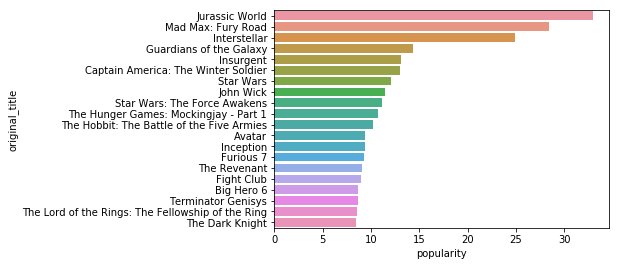

In [17]:
sb.barplot(data = data, x= 'popularity', y = 'original_title')

---
**任务3.2：**分析电影净利润（票房-成本）随着年份变化的情况，并简单进行分析。

In [ ]:
profit = pd.DataFrame({'profit' : tm_data['revenue_adj'] -  tm_data['budget_adj']})

In [47]:
tm_data.groupby('release_year')['revenue_adj' - 'budget_adj'].sum()

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [20]:
tm_data.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [36]:
import matplotlib.pyplot as plt

---

**[选做]任务3.3：**选择最多产的10位导演（电影数量最多的），绘制他们排行前3的三部电影的票房情况，并简要进行分析。

---

**[选做]任务3.4：**分析1968年~2015年六月电影的数量的变化。

---

**[选做]任务3.5：**分析1968年~2015年六月电影 `Comedy` 和 `Drama` 两类电影的数量的变化。

> 注意: 当你写完了所有的代码，并且回答了所有的问题。你就可以把你的 iPython Notebook 导出成 HTML 文件。你可以在菜单栏，这样导出**File -> Download as -> HTML (.html)、Python (.py)** 把导出的 HTML、python文件 和这个 iPython notebook 一起提交给审阅者。